Initial cost: 0.6931471805599433
After one update: b0 = -0.010000000000000002  b1 = 0.03

Final parameters after 100 iterations:
b0 = -1.3860129988231722
b1 = 0.48251798124819195
Decision boundary: 2.872458753221574
Final cost: 0.4680136982832365


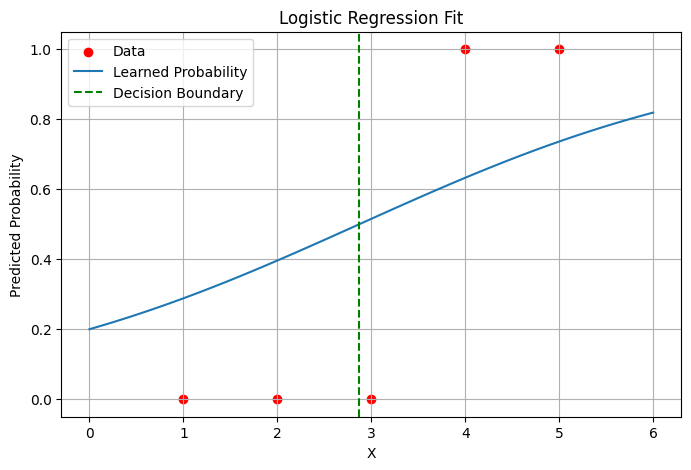

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data set
X = np.array([1., 2., 3., 4., 5.])
Y = np.array([0., 0., 0., 1., 1.])

# Sigmoid function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Initialize parameters
b0 = 0.0
b1 = 0.0
alpha = 0.1
n_iter = 100   # Number of iterations
eps = 1e-15
m = len(X)
history = []

# Initial cost
z = b0 + b1 * X
h = sigmoid(z)
initial_cost = -(1.0/m) * np.sum(Y * np.log(h + eps) + (1 - Y) * np.log(1 - h + eps))
print("Initial cost:", initial_cost)

# One gradient descent update
grad_b0 = np.mean(h - Y)
grad_b1 = np.mean((h - Y) * X)

b0 -= alpha * grad_b0
b1 -= alpha * grad_b1

print("After one update: b0 =", b0, " b1 =", b1)

# Full gradient descent loop
for it in range(n_iter):
    z = b0 + b1 * X
    h = sigmoid(z)

    grad_b0 = np.mean(h - Y)
    grad_b1 = np.mean((h - Y) * X)

    cost = -(1.0/m) * np.sum(Y * np.log(h + eps) + (1 - Y) * np.log(1 - h + eps))
    history.append((it, b0, b1, cost))

    b0 -= alpha * grad_b0
    b1 -= alpha * grad_b1

print("\nFinal parameters after {} iterations:".format(n_iter))
print("b0 =", b0)
print("b1 =", b1)

# Decision boundary
decision_boundary = -b0 / b1
print("Decision boundary:", decision_boundary)
print("Final cost:", history[-1][3])

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='red', label='Data')

X_plot = np.linspace(min(X)-1, max(X)+1, 100)
Y_plot = sigmoid(b0 + b1 * X_plot)

plt.plot(X_plot, Y_plot, label='Learned Probability')
plt.axvline(x=decision_boundary, color='green', linestyle='--', label='Decision Boundary')

plt.xlabel('X')
plt.ylabel('Predicted Probability')
plt.title("Logistic Regression Fit")
plt.legend()
plt.grid(True)
plt.show()
